In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import catboost as cb
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tqdm

In [329]:
df_train = pd.read_excel('train.xlsx')
df_test = pd.read_excel('test.xlsx')
df_result = pd.read_excel('result.xlsx')

In [330]:
df_train = df_train[df_train['well id'] != 156]
df_train.fillna(-1, inplace = True)
delta = 300

In [291]:
features = list()

for min_depth in tqdm.tqdm_notebook(range(1000, int(max(df_train["depth, m"])), delta)):
    df = df_train[(df_train["depth, m"] > min_depth) & (df_train["depth, m"] < min_depth + delta)]
    
    target = df["goal"]
    train = df.drop(['goal', 'lith', 'well id'], axis = 1)

    X_train, X_test, y_train, y_test = train_test_split(train, target, random_state = 42,test_size = 0.25)

    clf = cb.CatBoostClassifier(random_seed=42, logging_level='Silent')
    clf = clf.fit(X_train, y_train)

    data_outputs = clf.predict(X_test)

    importances = clf.feature_importances_
    
    features.append(importances)
    

    print(f1_score(y_test, data_outputs))
    
features = np.array(features)

0.9310696095076402
0.8968499073502161
0.8869936034115138
0.8161400837457176
0.7957221173721578
0.775177210111007
0.7708408516780947


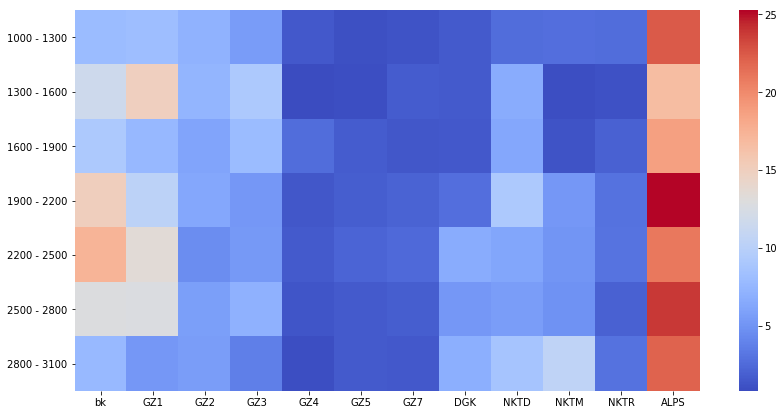

In [292]:
plt.figure(figsize=(14,7))
t = lambda x: "".join(str(a) for a in x)
sns.heatmap(features[:,1:], cmap='coolwarm', xticklabels=train.columns[1:],
            yticklabels=[t([item, ' - ', item+300]) for item in range(1000, int(max(df_train["depth, m"])), delta)])

In [336]:
def set_scanners(df, bound, features, test=False):
    delta = 300;
    bit_features = features < 10
    if(test):
        left = 2
        right = None
    else:
        left = 1
        right = -2
    for i, low_depth in enumerate(tqdm.tqdm_notebook(range(1000, int(max(df["depth, m"])), 300))):
        indexes = df[(df_train["depth, m"] > low_depth) & (df["depth, m"] < low_depth + delta)].index
        for j, col in enumerate(df.loc[indexes].columns[left:right]):
            if(bit_features[i][j]):
                df.loc[indexes, col] = -1

In [337]:
set_scanners(df_train, 10, features)

In [339]:
set_scanners(df_test, 10, features, test=True)

/home/mirror/anaconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/home/mirror/anaconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/home/mirror/anaconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/home/mirror/anaconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/home/mirror/anaconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolea

In [ ]:
#not done yet

target = df["goal"]
train = df.drop(['goal', 'lith', 'well id'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(train, target, random_state = 42,test_size = 0.25)

clf = cb.CatBoostClassifier(random_seed=42, 
                            logging_level='Silent',
                            l2_leaf_reg=10, 
                            od_type = "Iter",
                            od_wait = 50)
clf = clf.fit(X_train, y_train)

data_outputs = clf.predict(X_test)
#importances = clf.feature_importances_
features.append(importances)

print(f1_score(y_test, data_outputs),' ', y_test.shape[0]/y_train.shape[0])

return clf